<a href="https://colab.research.google.com/github/SVithurabiman/Vision/blob/main/Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train:', x_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
H=200
# Din = 784 # MINIST
# Normalize pixel values
x_train = x_train[range(Ntr),:]
x_test = x_test[range(Nte),:]
y_train = y_train[range(Ntr)]
y_test = y_test[range(Nte)]
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')



print('x_train',x_train.shape)
print('x_test',x_test.shape)
std=1e-5
w1 = std*np.random.randn(Din, H)
b1 = np.zeros(H)
w2 = std*np.random.randn(H, K)
b2 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)


batch_size=Ntr
iterations = round(Ntr/batch_size)*301  # Gradient descent interations
lr =1.2e-2
lr_decay=0.999
reg =1e-6
lr_hist = []
loss_history = [] # Vlaues of loss function at each iteration 
train_acc_history = [] # Training accuracy
val_acc_history = [] # Validation accuracy
test_loss=[]

for t in range(iterations):
    batch_indices= np.random.choice(Ntr,batch_size)
    x=x_train[batch_indices]
    y=y_train[batch_indices]
    h=1.0/(1.0+np.exp(-(x.dot(w1)+b1)))
    y_pred = h.dot(w2)+b2
    loss = (1./batch_size)*np.square(y_pred-y).sum() + reg*(np.sum(w2*w2)+np.sum(w1*w1))
    loss_history.append(loss)

    dy_pred = (1.0/batch_size)*2.0*(y_pred-y)
    dw2=h.T.dot(dy_pred)+reg*w2
    db2=dy_pred.sum(axis=0)
    dh=dy_pred.dot(w2.T)
    dw1=x.T.dot(dh*h*(1-h)) + reg*w1
    db1=(dh*h*(1-h)).sum(axis=0)

    x_t=x_train
    h=1/(1+np.exp(-(x_t.dot(w1)+b1)))
    y_pred=h.dot(w2)+b2

    count=[np.argmax(y_pred,axis=1)==np.argmax(y_train,axis=1)]
    train_acc=np.sum(count)/(len(np.argmax(y_train,axis=1)))
    train_acc_history.append(train_acc)


    x_t=x_test

    h=1/(1+np.exp(-(x_t.dot(w1)+b1)))
    y_pred=h.dot(w2)+b2
    valid_pred = [np.argmax(y_pred, axis=1) == np.argmax(y_test,axis=1)]
    temp=np.sum(valid_pred)/len(np.argmax(y_test,axis=1))
   
    val_acc_history.append(temp)


    x=x_test
    y=y_test
    h=1.0/(1.0+np.exp(-(x.dot(w1)+b1)))
    y_pred = h.dot(w2)+b2
    t_loss = (1./Nte)*np.square(y_pred-y).sum() + reg*(np.sum(w2*w2)+np.sum(w1*w1))
    test_loss.append(t_loss)
    
    lr_hist.append(lr)
    w1 -= lr*dw1
    w2 -= lr*dw2
    b1 -=lr*db1
    b2 -= lr*db2
    lr = lr*lr_decay 


    if ((t+1)%10==0) or (t==1) or (t==2) or(t==0):
        print("Epoch",t+1, "|", "Training Loss",loss_history[-1],"|", "Training Acc:",train_acc_history[-1],'|', "Test Loss",test_loss[-1],"|" ,'Validation Acc:',val_acc_history[-1] ,'|','Learning Rate:',lr)






# Printing accuracies and displaying w as images

x_train: (50000, 32, 32, 3)
x_train (50000, 3072)
x_test (10000, 3072)
w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)
Epoch 1 | Training Loss 0.9999404150893271 | Training Acc: 0.1 | Test Loss 0.9999407204791328 | Validation Acc: 0.1 | Learning Rate: 0.011988
Epoch 2 | Training Loss 0.9050226700284688 | Training Acc: 0.1 | Test Loss 0.9050266542273732 | Validation Acc: 0.1 | Learning Rate: 0.011976012000000001
Epoch 3 | Training Loss 0.9002864153582296 | Training Acc: 0.1 | Test Loss 0.9002889500668637 | Validation Acc: 0.1 | Learning Rate: 0.011964035988
Epoch 10 | Training Loss 0.8667820059712632 | Training Acc: 0.20388 | Test Loss 0.8665792181282638 | Validation Acc: 0.2031 | Learning Rate: 0.011880538562516979
Epoch 20 | Training Loss 0.8405918214921422 | Training Acc: 0.2758 | Test Loss 0.8401044566920735 | Validation Acc: 0.2768 | Learning Rate: 0.011762266377954415
Epoch 30 | Training Loss 0.8283604563460734 | Training Acc: 0.31216 | Test Loss 0.8280969083877192 | Validation

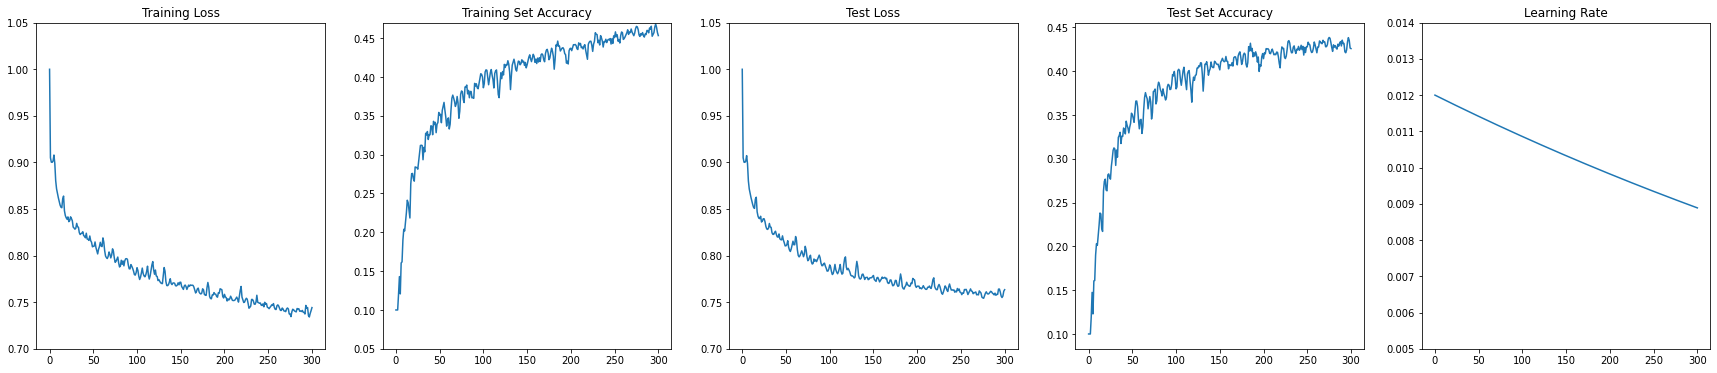

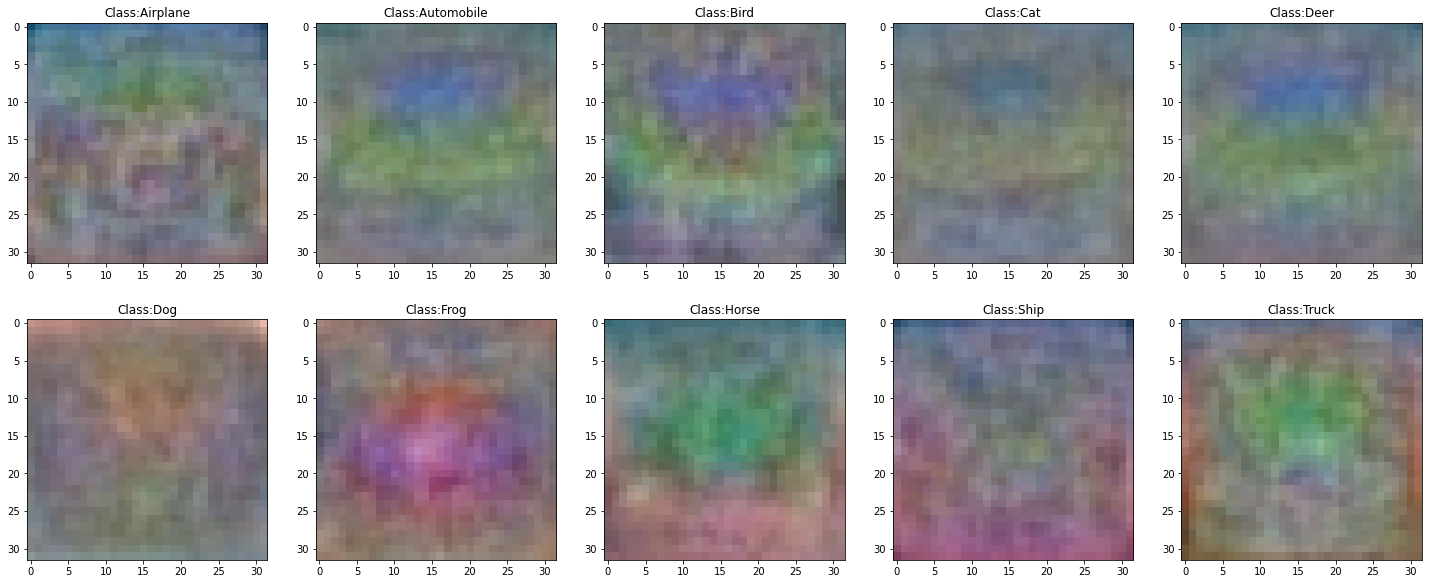

In [5]:
fig, ax = plt.subplots(1,5, figsize=(30,6))
ax[0].plot(loss_history)
ax[0].set_ylim(0.7,1.05)
ax[1].plot(train_acc_history)
ax[1].set_ylim(0.05,0.47)
ax[2].set_ylim(0.05,0.47)
ax[3].plot(val_acc_history)
ax[4].plot(lr_hist)
ax[4].set_ylim(0.005,0.014)
ax[2].plot(test_loss)
ax[2].set_ylim(0.7,1.05)


ax[0].set_title('Training Loss')
ax[1].set_title('Training Set Accuracy')

ax[2].set_title('Test Loss')
ax[3].set_title('Test Set Accuracy')
ax[4].set_title('Learning Rate')

weights_pos =  w1- np.min(w1)# Making the minimum weight zero.
images = ((weights_pos/np.max(weights_pos))*255).astype('uint8')
class_label = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
fig, axes  = plt.subplots(2,5, sharex='all', sharey='all', figsize=(25,10))

for i in range(K):
    image = images[:,i].reshape(32,32,3)
    plt.subplot(2,5,i+1),plt.imshow(image[:,:,::-1])
    title="Class:"+str(class_label[i])
    plt.title(title) 



